0 __header__
1 __version__
2 __globals__
3 sv
0 __header__
1 __version__
2 __globals__
3 sv
Start PCA process...
Reduced score shape is  (72000, 4)
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.057845115661621094 seconds ---
The test time is --- 0.0009958744049072266 seconds ---
Confusion matrix for LDA with PCA


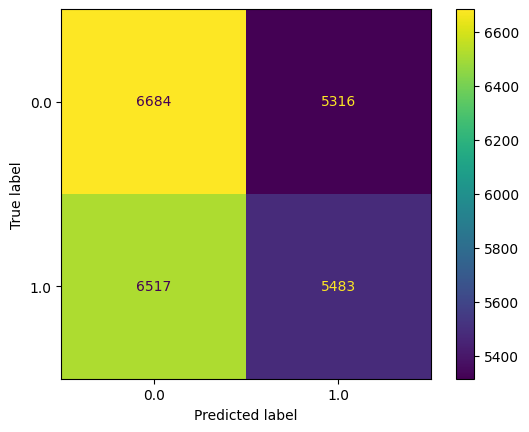

Reduced score shape is  (72000, 5)
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.047873735427856445 seconds ---
The test time is --- 0.0009980201721191406 seconds ---
Confusion matrix for LDA with PCA


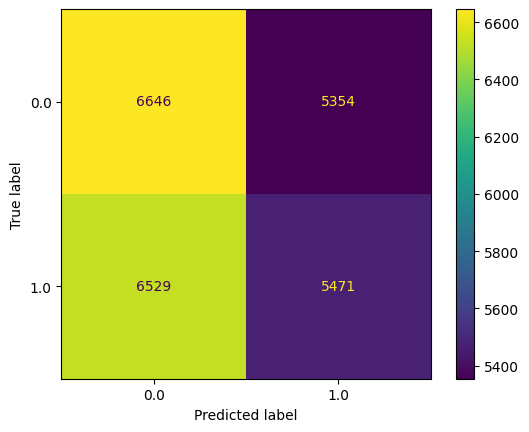

Reduced score shape is  (72000, 6)
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.053826332092285156 seconds ---
The test time is --- 0.001027822494506836 seconds ---
Confusion matrix for LDA with PCA


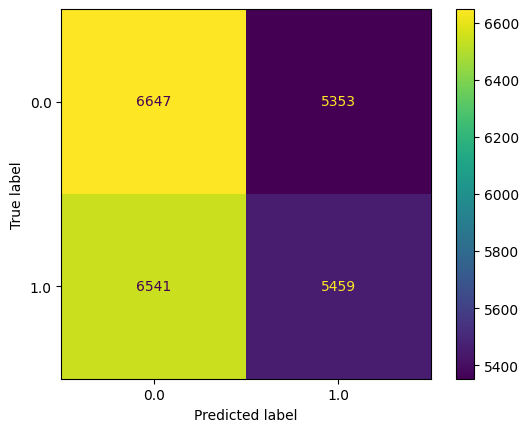

Reduced score shape is  (72000, 7)
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 7) 

The train time is --- 0.061835289001464844 seconds ---
The test time is --- 0.0009658336639404297 seconds ---
Confusion matrix for LDA with PCA


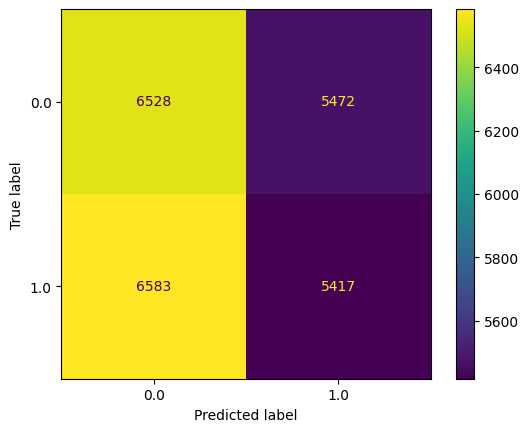

Reduced score shape is  (72000, 8)
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 8) 

The train time is --- 0.06783461570739746 seconds ---
The test time is --- 0.0017647743225097656 seconds ---
Confusion matrix for LDA with PCA


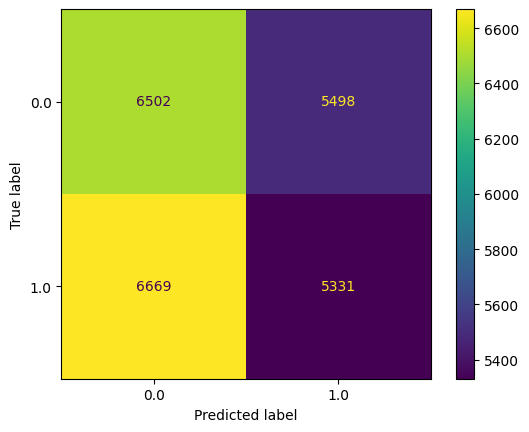

Reduced score shape is  (72000, 4)
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 97.75199365615845 seconds ---
The test time is --- 24.277154445648193 seconds ---
Confusion matrix for SVM with PCA


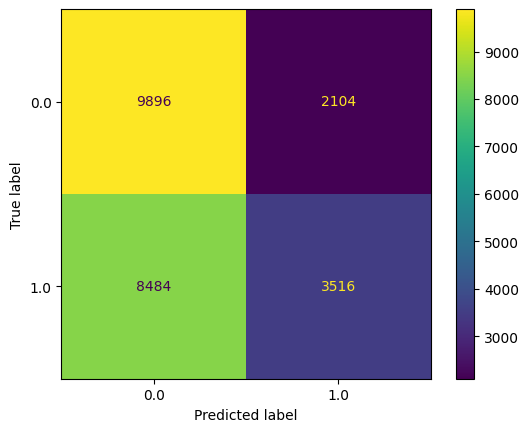

Reduced score shape is  (72000, 5)
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 102.05778408050537 seconds ---
The test time is --- 25.348759174346924 seconds ---
Confusion matrix for SVM with PCA


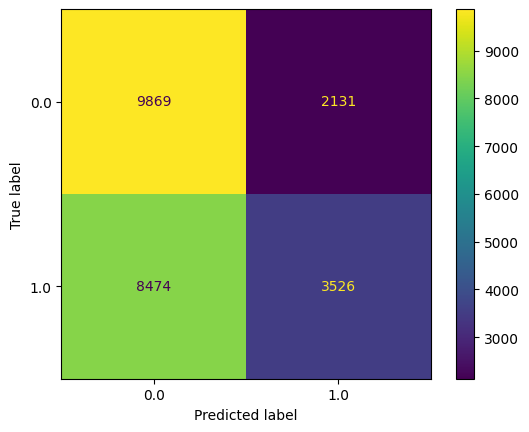

Reduced score shape is  (72000, 6)
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train time is --- 106.26054239273071 seconds ---
The test time is --- 25.543216705322266 seconds ---
Confusion matrix for SVM with PCA


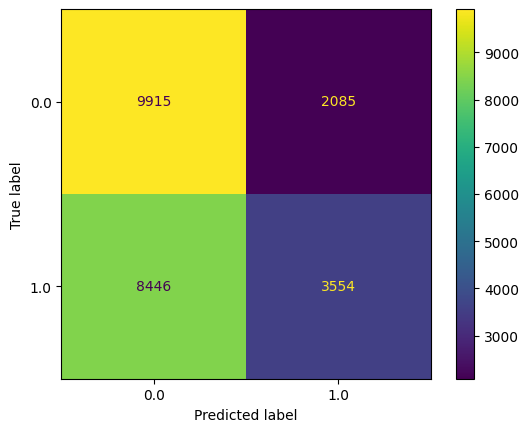

Reduced score shape is  (72000, 7)
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 7) 

The train time is --- 115.47944688796997 seconds ---
The test time is --- 26.892802238464355 seconds ---
Confusion matrix for SVM with PCA


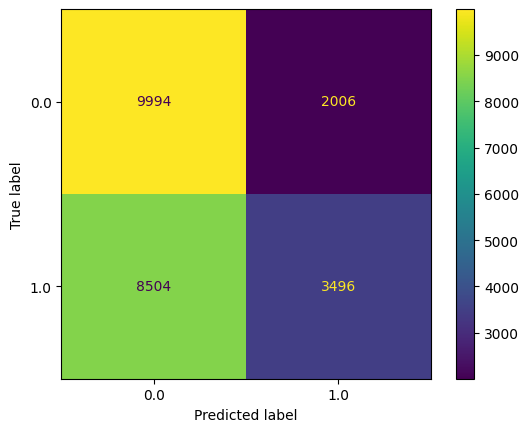

Reduced score shape is  (72000, 8)
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 8) 

The train time is --- 115.3432343006134 seconds ---
The test time is --- 27.445388317108154 seconds ---
Confusion matrix for SVM with PCA


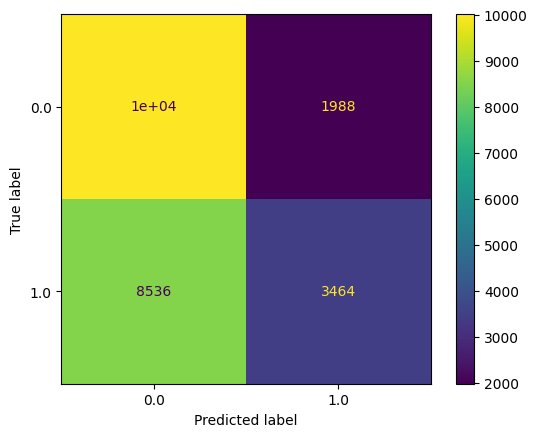

Start Feature Selection process...
Start Feature Selection with LDA...
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 8) 

The train time is --- 0.06682133674621582 seconds ---
The test time is --- 0.0009982585906982422 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 7) 

The train time is --- 0.0608370304107666 seconds ---
The test time is --- 0.000997781753540039 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 7) 

The train time is --- 0.06083846092224121 seconds ---
The test time is --- 0.0009987354278564453 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 7) 

The train time is --- 0.06286287307739258 seconds ---
The test time is --- 0.000997304916381836 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 7) 

The train time is --- 0.05884289741516113 seconds ---
The test tim

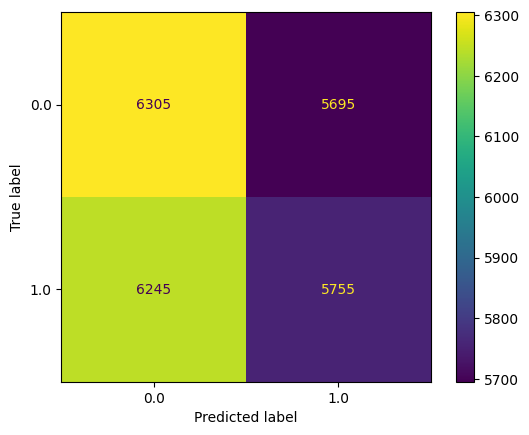

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.05385708808898926 seconds ---
The test time is --- 0.0009596347808837891 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.05385756492614746 seconds ---
The test time is --- 0.0009636878967285156 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.050863027572631836 seconds ---
The test time is --- 0.0012302398681640625 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.05285811424255371 seconds ---
The test time is --- 0.0011684894561767578 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 6) 

The train time is --- 0.05189251899719238 seconds ---
The test time is --- 0.0009655952453613281 seconds ---
The experiment is Linear

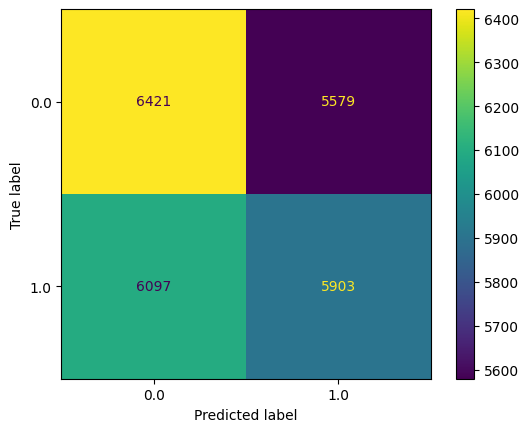

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.04886126518249512 seconds ---
The test time is --- 0.0009715557098388672 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.045879364013671875 seconds ---
The test time is --- 0.0009946823120117188 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.0448763370513916 seconds ---
The test time is --- 0.0009777545928955078 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.046912431716918945 seconds ---
The test time is --- 0.0009920597076416016 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 5) 

The train time is --- 0.044873714447021484 seconds ---
The test time is --- 0.0011317729949951172 seconds ---
The experiment is Linea

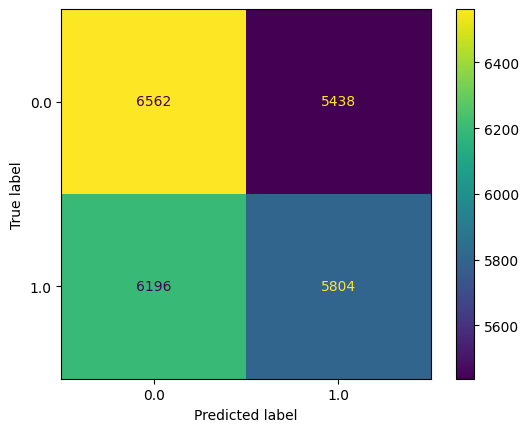

The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.038895368576049805 seconds ---
The test time is --- 0.0010099411010742188 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.03786754608154297 seconds ---
The test time is --- 0.0009958744049072266 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.03693437576293945 seconds ---
The test time is --- 0.0009660720825195312 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.037926435470581055 seconds ---
The test time is --- 0.0010101795196533203 seconds ---
The experiment is LinearDiscriminantAnalysis() 

The shape of X_train is (72000, 4) 

The train time is --- 0.03693437576293945 seconds ---
The test time is --- 0.0009965896606445312 seconds ---
The removed colomns [2,

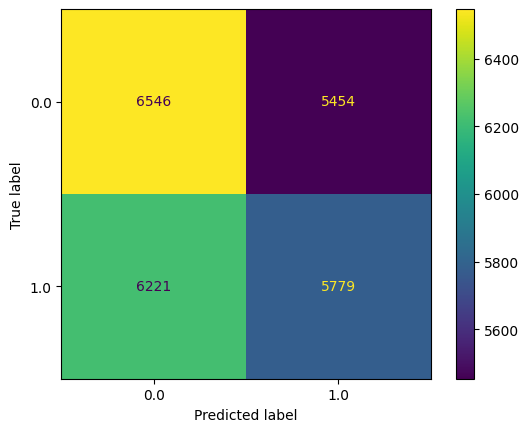

Start Feature Selection with SVM...
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 8) 

The train time is --- 115.65986275672913 seconds ---
The test time is --- 27.356476306915283 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 7) 

The train time is --- 112.1052348613739 seconds ---
The test time is --- 26.730371475219727 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 7) 

The train time is --- 111.80827379226685 seconds ---
The test time is --- 26.873056650161743 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 7) 

The train time is --- 107.82914996147156 seconds ---
The test time is --- 26.863954782485962 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 7) 

The train time is --- 110.19353318214417 seconds ---
The test time is --- 27.055453538894653 seconds ---
The experiment is SVC(kernel='linear') 

The shape

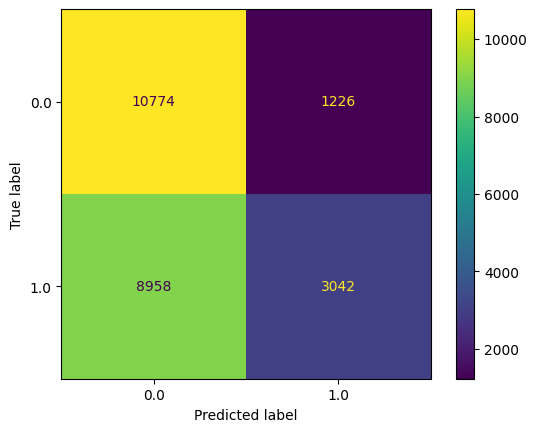

The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train time is --- 109.69916415214539 seconds ---
The test time is --- 25.06497883796692 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train time is --- 102.41215085983276 seconds ---
The test time is --- 25.399780750274658 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train time is --- 117.5525689125061 seconds ---
The test time is --- 25.232070922851562 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train time is --- 104.42115664482117 seconds ---
The test time is --- 25.00439739227295 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train time is --- 134.71283841133118 seconds ---
The test time is --- 24.84463620185852 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 6) 

The train t

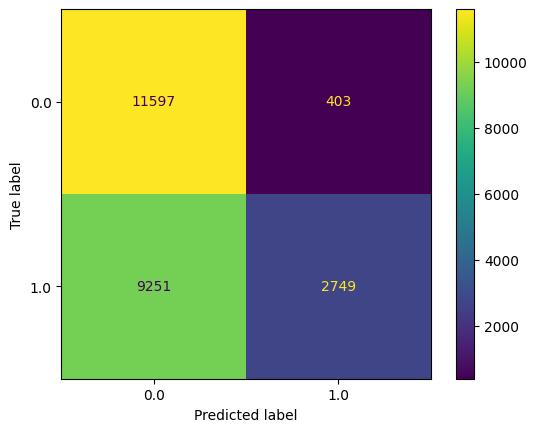

The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 104.36744022369385 seconds ---
The test time is --- 25.354860067367554 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 104.81531310081482 seconds ---
The test time is --- 25.287683725357056 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 140.8079912662506 seconds ---
The test time is --- 25.554832458496094 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 113.07741355895996 seconds ---
The test time is --- 25.425658464431763 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train time is --- 108.11355948448181 seconds ---
The test time is --- 25.41310167312622 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 5) 

The train

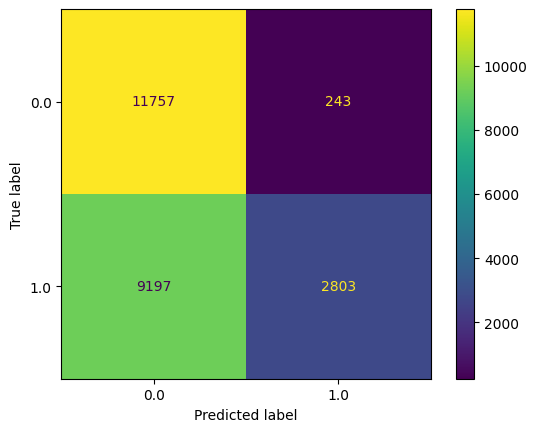

The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 145.2913053035736 seconds ---
The test time is --- 24.44347310066223 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 96.67743682861328 seconds ---
The test time is --- 24.28598642349243 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 120.97378730773926 seconds ---
The test time is --- 24.255806922912598 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 101.48723340034485 seconds ---
The test time is --- 24.301944732666016 seconds ---
The experiment is SVC(kernel='linear') 

The shape of X_train is (72000, 4) 

The train time is --- 124.37851762771606 seconds ---
The test time is --- 24.263723373413086 seconds ---
The removed colomns [3, 4, 1, 0]
The remained colomns [2, 5, 6, 7]

The experiment is SVC

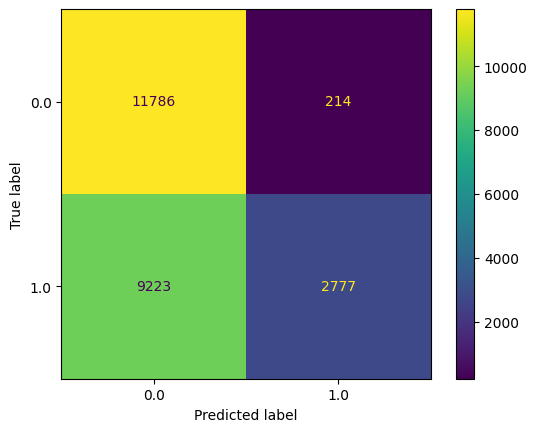

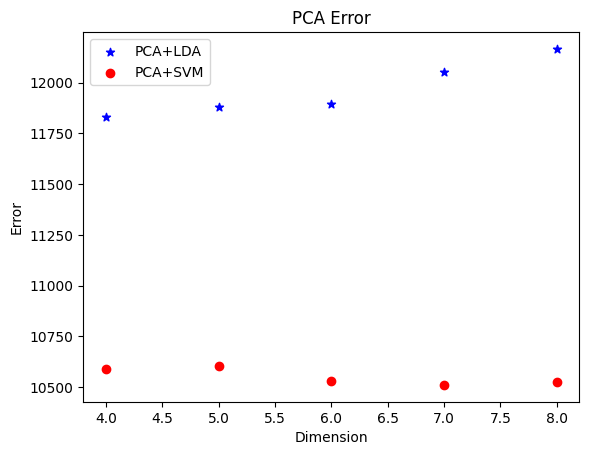

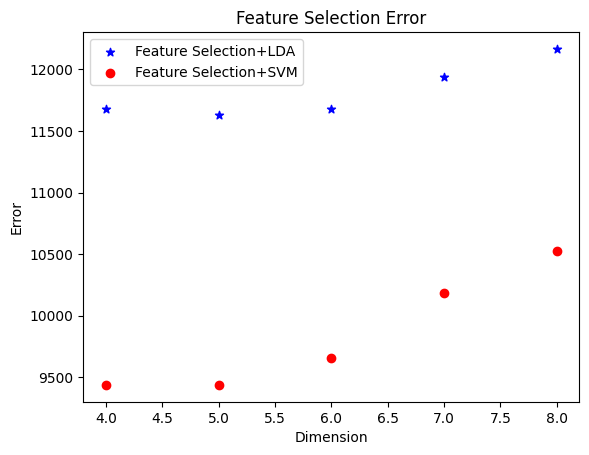

In [3]:
import scipy.io as sio

import matplotlib.pyplot as plt
import numpy as np
import sklearn.discriminant_analysis
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from function_plot import Load_mat_single
from function_plot import mat_to_array
from function_plot import plot_confusion_matrix
from function_plot import train_test
import time


# Load data
path_good = 'data//baseline_20220915_sv.mat'
path_bad = 'data//fault7_20220915_sv.mat'

mat_contents_good = Load_mat_single(path_good)
good_data = mat_to_array(mat_contents_good)

mat_contents_bad = Load_mat_single(path_bad)
bad_data = mat_to_array(mat_contents_bad)


# constuct the data

X = np.concatenate((good_data, bad_data))

n_sample = good_data.shape[0]
n_feature = good_data.shape[1]

Y = np.zeros(n_sample)
Y = np.concatenate((Y, np.ones(n_sample)))

# PCA

print("Start PCA process...")


X_mean = X - np.mean(X)


C_x = np.dot(X_mean.T, X_mean)

SS_pca, V = np.linalg.eig(C_x)

sortIndex = np.flip(np.argsort(SS_pca))

dimension = good_data.shape[1]
VSorted = np.empty((dimension, 0))

for i in range(dimension):
    VSorted = np.append(
        VSorted, V[:, sortIndex[i]].reshape(dimension, 1), axis=1)


classificationError_lda_pca = np.zeros(5,)
classificationError_svm_pca = np.zeros(5,)

Score_Sorted = np.dot(X, VSorted)

train_index = np.arange(0, n_sample*0.75).astype(int).tolist() + \
    np.arange(n_sample, n_sample+n_sample*0.75).astype(int).tolist()
test_index = np.arange(n_sample*0.75, n_sample).astype(int).tolist() + \
    np.arange(n_sample+n_sample*0.75, n_sample+n_sample).astype(int).tolist()

#  data for training and testing
X_train = Score_Sorted[train_index, :]
X_test = Score_Sorted[test_index, :]


Y_train = Y[train_index]
Y_test = Y[test_index]


# Classifier 1 LDA with PCA

for numDims in range(4, 9):

    Score_Reduced = X_train[:, 0:numDims]
    print('Reduced score shape is ', Score_Reduced.shape)

    lda_pca = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
    X_test_temp = X_test[:, 0:numDims]

    error, prediction_lda_pca = train_test(
        Score_Reduced, Y_train, X_test_temp, Y_test,  lda_pca)

    classificationError_lda_pca[numDims-4] = error
    print("Confusion matrix for LDA with PCA")

    plot_confusion_matrix(Y_test, prediction_lda_pca, lda_pca)


# Classifier 2 SVM with PCA

for numDims in range(4, 9):

    Score_Reduced = X_train[:, 0:numDims]
    print('Reduced score shape is ', Score_Reduced.shape)

    clf_svm_pca = svm.SVC(kernel='linear')

    X_test_temp = X_test[:, 0:numDims]

    error, prediction_svm_pca = train_test(
        Score_Reduced, Y_train, X_test_temp, Y_test,  clf_svm_pca)

    classificationError_svm_pca[numDims-4] = error

    print("Confusion matrix for SVM with PCA")
    plot_confusion_matrix(Y_test, prediction_svm_pca, lda_pca)


# # Feature selection-backward search

print("Start Feature Selection process...")

X_train_fs = X[train_index, :]

X_test_fs = X[test_index, :]

n_train = X_train_fs.shape[0]
n_test = X_test_fs.shape[0]
final_dimension = 5

# Classifier 1 LDA with Feature selection
print('Start Feature Selection with LDA...')


removed = []

index_all = [0, 1, 2, 3, 4, 5, 6, 7]
remaining = index_all


classificationError_lda_fs = n_test*np.ones(final_dimension)

lda_fs = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

error_temp, item_ignored = train_test(
    X_train_fs, Y_train, X_test_fs, Y_test, lda_fs)

classificationError_lda_fs[0] = error_temp


for iteration in range(final_dimension-1):

    error_inside = n_test*np.ones(n_feature)
    for idx, item in enumerate(remaining):
        temp_removed = removed[:]
        temp_removed.append(item)
        # print(temp_removed)

        Xtrain_temp = np.delete(X_train_fs, temp_removed, axis=1)
        Xtest_temp = np.delete(X_test_fs, temp_removed, axis=1)

        lda_temp = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

        error_temp, item_ignored = train_test(Xtrain_temp, Y_train,
                                              Xtest_temp, Y_test, lda_temp)

        error_inside[idx] = error_temp

    worst_i = np.argmin(error_inside)

    worst_item = remaining[worst_i]

    removed.append(worst_item)
    print("The removed colomns", removed)

    remaining.remove(worst_item)
    print("The remained colomns {}\n".format(remaining))

    X_train_selection = np.delete(X_train_fs, removed, 1)
    X_test_selection = np.delete(X_test_fs, removed, 1)

    lda_fs = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

    error, prediction_lda_fs = train_test(X_train_selection, Y_train,
                                          X_test_selection, Y_test, lda_fs)

    classificationError_lda_fs[iteration+1] = error

    print("Confusion matrix for LDA with Feature selection")

    plot_confusion_matrix(Y_test, prediction_lda_fs, lda_fs)


# Classifier 2 SVM with Feature selection

print('Start Feature Selection with SVM...')

classificationError_svm_fs = n_test*np.ones(final_dimension)

removed = []

index_all = [0, 1, 2, 3, 4, 5, 6, 7]
remaining = index_all


clf_svm_fs = svm.SVC(kernel='linear')
error_temp, item_ignored = train_test(
    X_train_fs, Y_train, X_test_fs, Y_test, clf_svm_fs)

classificationError_svm_fs[0] = error_temp


for iteration in range(final_dimension-1):

    error_inside = n_test*np.ones(n_feature)
    for idx, item in enumerate(remaining):
        temp_removed = removed[:]
        temp_removed.append(item)
        # print(temp_removed)

        Xtrain_temp = np.delete(X_train_fs, temp_removed, axis=1)
        Xtest_temp = np.delete(X_test_fs, temp_removed, axis=1)

        svm_temp = svm.SVC(kernel='linear')
        error_temp, item_ignored = train_test(Xtrain_temp, Y_train,
                                              Xtest_temp, Y_test, svm_temp)

        error_inside[idx] = error_temp

    worst_i = np.argmin(error_inside)

    worst_item = remaining[worst_i]

    removed.append(worst_item)
    print("The removed colomns", removed)

    remaining.remove(worst_item)
    print("The remained colomns {}\n".format(remaining))

    X_train_selection = np.delete(X_train_fs, removed, 1)
    X_test_selection = np.delete(X_test_fs, removed, 1)

    svm_fs = svm.SVC(kernel='linear')

    error, prediction_svm_fs = train_test(X_train_selection, Y_train,
                                          X_test_selection, Y_test, svm_fs)

    classificationError_svm_fs[iteration+1] = error

    print("Confusion matrix for SVM with Feature selection")

    plot_confusion_matrix(Y_test, prediction_svm_fs, svm_fs)


plt.figure()
plt.scatter([8, 7, 6, 5, 4], np.flip(classificationError_lda_pca),
            c='b', marker='*', label="PCA+LDA")
plt.scatter([8, 7, 6, 5, 4], np.flip(classificationError_svm_pca),
            c='r', marker='o', label="PCA+SVM")
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('PCA Error')
plt.legend()


plt.figure()
plt.scatter([8, 7, 6, 5, 4], classificationError_lda_fs,
            c='b', marker='*', label="Feature Selection+LDA")
plt.scatter([8, 7, 6, 5, 4], classificationError_svm_fs,
            c='r', marker='o', label="Feature Selection+SVM")
plt.xlabel('Dimension')
plt.ylabel('Error')
plt.title('Feature Selection Error')
plt.legend()
